In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화

In [4]:
# 1. 데이터 셋 
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

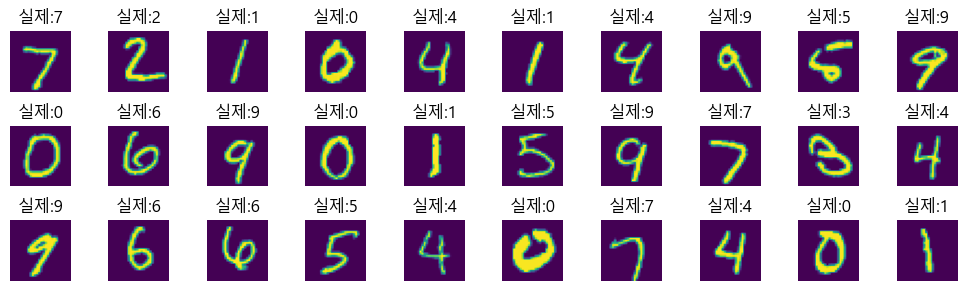

In [18]:
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col,plt_row))
plt.rcParams['figure.figsize'] = [plt_col,plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
# 10으로 나눈 몫, 10으로 나눈 나머지 
# axes[0,0].imshow(X_test[0].reshape(width,height))
# axes[0,0].axis('off')
# title = '실제:{}'.format(y_test[0])
# axes[0,0].set_title(title)
# plt.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(plt_row*plt_col): # 30번의 for문
    subax = axes[i//plt_col, i%plt_col]  # //:몫연산자, %:나머지 연산자
    subax.imshow(X_test[i].reshape(width,height))
    subax.axis('off')
    title = "실제:{}".format(y_test[i])
    subax.set_title(title)
plt.tight_layout()

# 1. DNN

In [23]:
%%time
# 1.데이터 생성 및 전처리 
width=28; height=28
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28,28) => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1,width*height).astype('float32')/255.0
X_val = X_val.reshape(-1,width*height).astype('float32')/255.0
X_test = X_test.reshape(-1,width*height).astype('float32')/255.0

# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, y_train.shape,X_val.shape,y_val.shape ,X_test.shape, y_test.shape

# 2. 모델 구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
    
])

# 3. 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
model.fit(X_train, Y_train,
         epochs=50,
         validation_data=(X_val, Y_val),
         verbose=1)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2729 - accuracy: 0.9171 - val_loss: 0.1241 - val_accuracy: 0.9649
Epoch 2/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1393 - accuracy: 0.9587 - val_loss: 0.1028 - val_accuracy: 0.9716
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1152 - accuracy: 0.9652 - val_loss: 0.0836 - val_accuracy: 0.9753
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0935 - accuracy: 0.9725 - val_loss: 0.0987 - val_accuracy: 0.9715
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0838 - accuracy: 0.9750 - val_loss: 0.1025 - val_accuracy: 0.9722
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0739 - accuracy: 0.9770 - val_loss: 0.0913 - val_accuracy: 0.9780
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0695 - accuracy: 0.9795 - val_loss: 0.0932 -

In [27]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1725 - accuracy: 0.9829


[0.17250576615333557, 0.9829000234603882]

In [26]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print('실제값 :',y_test)
print('실제값 :', np.argmax(Y_test, axis=1))
yhat=model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 4ms/step


array([[ 970,    1,    2,    0,    1,    0,    4,    1,    1,    0],
       [   0, 1126,    2,    0,    0,    1,    3,    0,    3,    0],
       [   1,    0, 1021,    0,    1,    0,    2,    4,    3,    0],
       [   0,    0,    5,  993,    0,    3,    0,    3,    4,    2],
       [   1,    1,    2,    1,  952,    0,    4,    3,    1,   17],
       [   2,    0,    0,    4,    1,  869,    9,    1,    5,    1],
       [   3,    2,    0,    0,    1,    2,  950,    0,    0,    0],
       [   0,    2,    6,    1,    0,    0,    0, 1013,    3,    3],
       [   3,    1,    3,    4,    2,    1,    3,    3,  948,    6],
       [   0,    4,    0,    7,    4,    3,    0,    4,    0,  987]],
      dtype=int64)

In [31]:
# 실제값과 예측값이 다른 갯수(방법1)
cnt = 0
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i!=j:
            cnt += data
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 171


In [33]:
# 실제값과 예측값이 다른 갯수(방법2)
cnt = 0
for y,h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 171


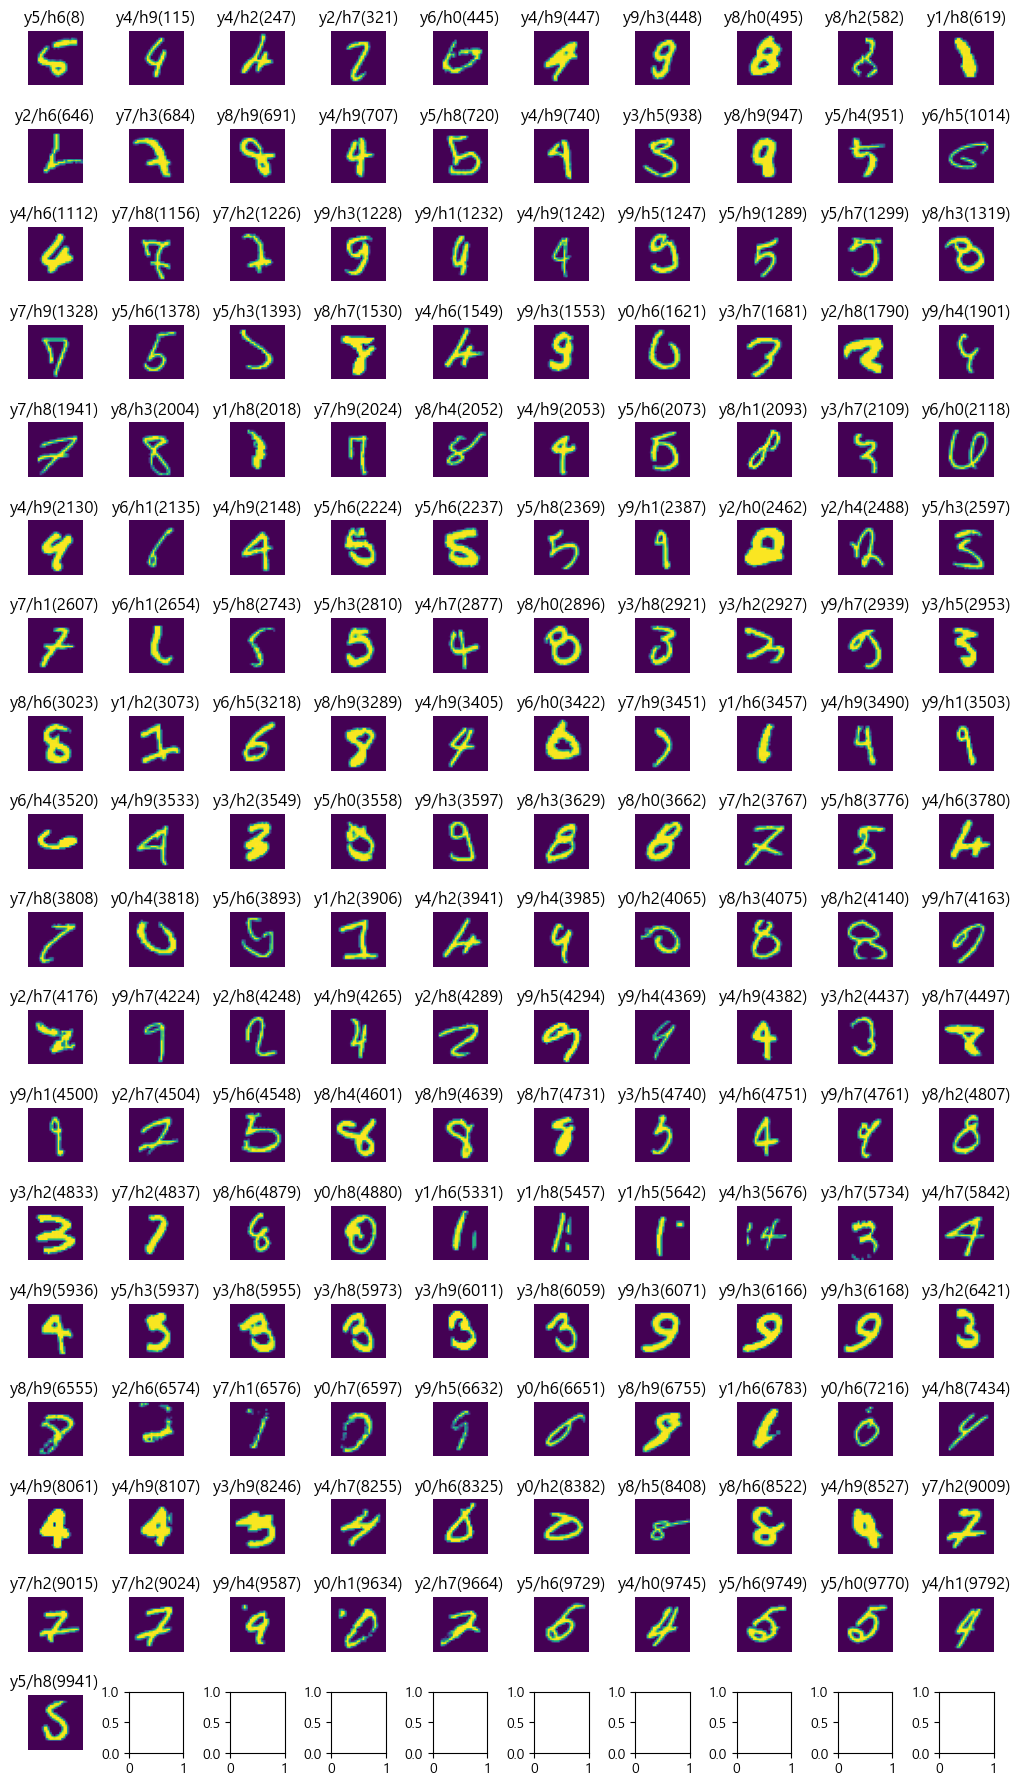

In [38]:
# CNN을 사용하여 에측이 틀린 데이터 출력 (yhat과 y_test가 다른 것들 171개)
plt_row = 18
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col,plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
# while문으로 변경 
i=0 # yhat과 y_test의 index => yhat[i], y_test[i]를 비교.
cnt = 0
while (i<len(y_test)) & (cnt<plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue
        
    subax = axes[cnt//plt_col, cnt%plt_col]  # //:몫연산자, %:나머지 연산자
    subax.imshow(X_test[i].reshape(width,height))
    subax.axis('off')
    title = "y{}/h{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가 
    i += 1 # index 번호 증가
plt.tight_layout()

# CNN(컨볼루션 레이어 포함) - 교안 31page

In [39]:
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test)= mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 (28,28) => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((50000, 784),
 (50000, 10),
 (10000, 784),
 (10000, 10),
 (10000, 784),
 (10000, 10))

In [ ]:
# 2. 모델 생성
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
# CNN(합성곱NN)
# 필터 사이즈는 프로그래머가 조정(풀링사이즈). 학습후 컴퓨터가
# MAX풀링(필터중 최대값) , 에버리지 풀링 
# 3개의 필터이고 이미지가 15라고 봤을 때 15-3+1 = 13 / 최종 이미지는 13으로 적어짐